# HarvestStat Data Analysis - Mozambique

## Issue 1: Wrong duplicates of Sweet Potatoes and Cassava in Mozambique

In [21]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Mozambique',
    'product': 'Sweet Potatoes',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
df[df['indicator'] == 'Quantity Produced'].pivot_table(index='season_year', columns='fnid', values='value', aggfunc='max')

fnid,MZ1990A101,MZ1990A102,MZ1990A103,MZ1990A104,MZ1990A105,MZ1990A106,MZ1990A107,MZ1990A108,MZ1990A109,MZ1990A110,...,MZ2013A102,MZ2013A103,MZ2013A104,MZ2013A105,MZ2013A106,MZ2013A107,MZ2013A108,MZ2013A109,MZ2013A110,MZ2013A111
season_year,,,,,,,,,,,,,,,,,,,,,
Main harvest 2002,11944.0,24003.0,6191.0,48742.0,21740.0,NaN,21830.0,34890.0,22772.0,137110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main harvest 2005,3073992.0,22008700.0,8833394.0,29156730.0,21350.0,17138630.0,13215070.0,15095110.0,88000770.0,155015600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main harvest 2006,3060.0,35360.0,4360.0,80690.0,22420.0,NaN,11100.0,30700.0,93130.0,97400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main harvest 2007,7910.0,55540.0,7830.0,177530.0,15010.0,NaN,8690.0,19930.0,74530.0,288610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main harvest 2008,6450.0,49690.0,4530.0,46480.0,39000.0,NaN,1760.0,51310.0,91500.0,106440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main harvest 2014,2091.0,25737.0,3051.0,51933.0,NaN,9143.0,25662.0,23504.0,49917.0,39898.0,...,25737.0,3051.0,51933.0,NaN,9143.0,25662.0,23504.0,49917.0,39898.0,182218.0
Main harvest 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,580000.0,10400.0,14500.0,272800.0,NaN,30450.0,14500.0,472300.0,13050.0,960110.0


In [23]:
df[
    (df['fnid']=='MZ1990A101') &
    (df['indicator'] == 'Quantity Produced') &
    (df['season_year'] == 'Main harvest 2005')
].T

,1,61,135,136,663
country,Mozambique,Mozambique,Mozambique,Mozambique,Mozambique
source_organization,Directorate of Planning and International Coop...,Directorate of Planning and International Coop...,Ministério da Agricultura e Segurança Alimenta...,Ministério da Agricultura e Segurança Alimenta...,Ministério da Agricultura e Segurança Alimenta...
source_document,Anuário de Estatísticas Agrárias,"Anuário de Estatísticas Agrárias, Mozambique",Anuário de Estatísticas Agrárias,Anuário de Estatísticas Agrárias,FEWS Agro_Maps
geographic_unit_full_name,"Cabo Delgado, Mozambique","Cabo Delgado, Mozambique","Cabo Delgado, Mozambique","Cabo Delgado, Mozambique","Cabo Delgado, Mozambique"
geographic_unit_name,Cabo Delgado,Cabo Delgado,Cabo Delgado,Cabo Delgado,Cabo Delgado
fnid,MZ1990A101,MZ1990A101,MZ1990A101,MZ1990A101,MZ1990A101
admin_0,Mozambique,Mozambique,Mozambique,Mozambique,Mozambique
admin_1,Cabo Delgado,Cabo Delgado,Cabo Delgado,Cabo Delgado,Cabo Delgado
admin_2,None,None,None,None,None
admin_3,None,None,None,None,None


In [1]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Mozambique',
    'product': 'Cassava',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
df[df['fnid'] == 'MZ1990A104'].pivot_table(index='season_year', columns='indicator', values='value', aggfunc='max')

indicator,Area Planted,Quantity Produced,Yield
season_year,,,
Main harvest 2000,943.136171,4904.308088,5.200000
Main harvest 2001,1260.230244,6553.197268,5.200000
Main harvest 2002,1322.856779,103419.000000,5.825337
Main harvest 2003,1319.613424,7682.599768,5.821856
Main harvest 2004,1401.373641,8408.241845,6.000000
Main harvest 2005,1442.076181,118988.000000,NaN
Main harvest 2006,2560.927513,197683.000000,4.968823
Main harvest 2007,2521.335909,13933.000000,5.526039
Main harvest 2008,2655.044111,14225.000000,5.357726


## Validation with FAOSTAT and CHIRPS Precipitation

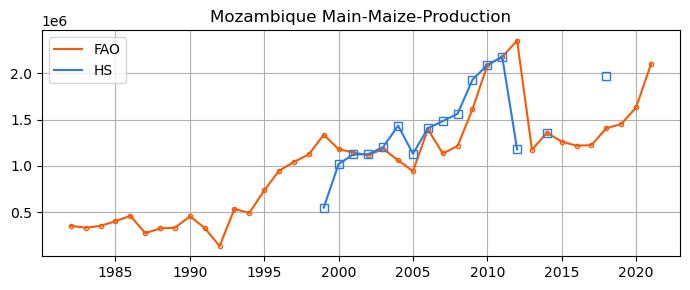

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Crop Data ------------------------------------- #
country_name, season_name, product_name_fdw, product_name_fao,  = 'Mozambique', 'Main', 'Maize', 'Maize (corn)'
shape_code, prcp_start_month, prcp_season_name, prcp_year_offset = 'MZ2013A0', 10, 'OND PRCP (mm)', +1
# HarvestStat
df = pd.read_csv('../public/hvstat_data.csv', index_col=0)
df = df[
    (df['country'] == country_name) &
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name_fdw])) &
    (df['indicator'] == 'production')
].copy()
df['year'] = df['harvest_year']
data_hs = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').squeeze()
# FAO-STAT
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['Area'] == country_name) &
    (df['Item'] == product_name_fao) &
    (df['Element'] == 'Production')
].set_index('Year')['Value']
# Merge
data = pd.concat([data_fao,data_hs], axis=1, keys=['FAO','HS']).sort_index()
data = data.reindex(np.array(range(1982,2024)))
# ---------------------------------------------------- #
# Load precipitation --------------------------------- #
#fn = '../data/prcp_chirps-v2.hdf'
#prcp_nat = pd.read_hdf(fn)[shape_code].resample('1M').agg('sum')
#prcp_nat.index = prcp_nat.index.map(lambda x: x.replace(day=1))
#prcp_nat.name = 'PRCP'
#prcp_nat.index = prcp_nat.index + pd.DateOffset(years=prcp_year_offset)
# Forward rolling summation
#indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
#prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
#prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
#prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
#prcp_label = prcp_season_name
# Correlations
#corr_value = pd.concat([data,prcp_nat],axis=1).corr()
#print(f'{season_name}-{product_name_fdw} Correlation:\n{corr_value}')
# ---------------------------------------------------- #
# Comparison with Precipitation ---------------------- #
fig, ax1 = plt.subplots(figsize=(7,3))
fig.set_facecolor('white')
data.plot(ax=ax1, grid=True, markerfacecolor='None',color=['#F55A05','#2C7BDD'])
marker = ['.','s']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
# years = data.index
# ax1.set_xticks(years)
# ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
#ax1.set_xlim([data.index[0]-0.5, data.index[-1]+0.5])
#ax1.set_xlabel('Year')
#ax1.set_ylabel('National %s Production (ton)' % product_name_fdw)
#ax1.patch.set_facecolor('white')
# Precipitation
#year, value = prcp_nat.index, prcp_nat.values
#ax2 = ax1.twinx()
#plt.bar(year, value, alpha=.25, color='grey')
#ax2.set_ylim([0, value.max()*1.3])
#ax2.set_ylabel(prcp_label + ' (year+%d)'%prcp_year_offset, labelpad=10)
#ax2.grid(False)
#ax1.set_zorder(1)  
#ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
#ax1.legend(loc='upper left')
#ax1.annotate(
#    'R: %.3f (HS)\nR: %.3f (FAO)' % (corr_value.loc['HS','PRCP'], corr_value.loc['FAO','PRCP']), 
#    xy=(1, 0.2), xycoords='axes fraction', fontsize=10,
#    xytext=(-5, -5), textcoords='offset points',
#    ha='right', va='top'
#)
title = f'{country_name} {season_name}-{product_name_fdw}-Production'# and {prcp_label}'
ax1.set_title(title)
fig.tight_layout()
plt.show()
# ---------------------------------------------------- #

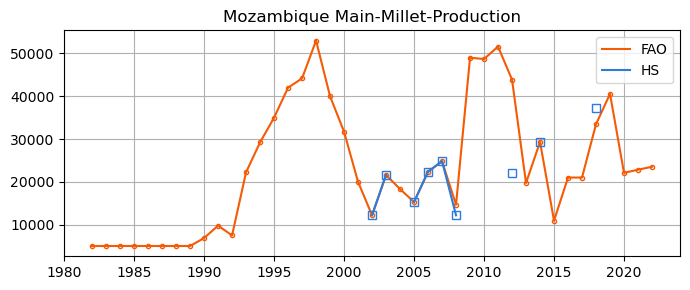

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Crop Data ------------------------------------- #
country_name, season_name, product_name_fdw, product_name_fao,  = 'Mozambique', 'Main', 'Millet', 'Millet'
shape_code, prcp_start_month, prcp_season_name, prcp_year_offset = 'MZ2013A0', 10, 'OND PRCP (mm)', +1
# HarvestStat
df = pd.read_csv('../public/hvstat_data.csv', index_col=0)
df = df[
    (df['country'] == country_name) &
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name_fdw])) &
    (df['indicator'] == 'production')
].copy()
df['year'] = df['harvest_year']
data_hs = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').squeeze()
# FAO-STAT
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['Area'] == country_name) &
    (df['Item'] == product_name_fao) &
    (df['Element'] == 'Production')
].set_index('Year')['Value']
# Merge
data = pd.concat([data_fao,data_hs], axis=1, keys=['FAO','HS']).sort_index()
data = data.reindex(np.array(range(1982,2024)))
# ---------------------------------------------------- #
fig, ax1 = plt.subplots(figsize=(7,3))
fig.set_facecolor('white')
data.plot(ax=ax1, grid=True, markerfacecolor='None',color=['#F55A05','#2C7BDD'])
marker = ['.','s']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
title = f'{country_name} {season_name}-{product_name_fdw}-Production'# and {prcp_label}'
ax1.set_title(title)
fig.tight_layout()
plt.show()
# ---------------------------------------------------- #

In [8]:
df = pd.read_csv('../public/hvstat_data.csv', index_col=0)
df['product'].unique()

array(['Cassava', 'Maize', 'Potato', 'Sweet Potatoes', 'Beans',
       'Groundnuts', 'Pineapple', 'Banana', 'Sorghum', 'Onions', 'Tomato',
       'Lemon', 'Mango', 'Millet', 'Garlic', 'Soybean', 'Rice', 'Cabbage',
       'Carrots', 'Avocado', 'Wheat', 'Cowpeas', 'Okras', 'Green bean',
       'Cocoyam', 'Gram', 'Pigeon Peas', 'Barley', 'Yams',
       'Groundnuts (In Shell)', 'Sesame Seed', 'Bambara groundnut',
       'Cowpea', 'Sorghum (Red)', 'Fonio', 'Pea', 'Oats', 'Sugarcane',
       'Rice (Paddy)', 'Beans (mixed)', 'Millet (Finger)',
       'Potato (Irish)', 'Sunflower Seed', 'Pigeon pea (Unspecified)',
       'Bean (Hyacinth)', 'Millet (Pearl)', 'Tangerine', 'Field Peas',
       'Beans (Pinto)', 'Chick Peas', 'Cowpeas (Mixed)', 'Velvet bean',
       'Spanish peanut', 'Sweet Potatoes (Orange)', 'Virginia peanut',
       'Beans (Lima)', 'Sweet Potatoes (Non-Orange)',
       'Groundnuts (In Shell, Large)', 'Groundnuts (In Shell, Small)',
       'Canola seed', 'Cottonseed', 'Sunflower 